In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
import os.path
# Clustering
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# our functions
import mnist

In [13]:
save_dir="./mnist-dataset/"
(x_train , y_train) , (x_test, y_test) = mnist.load_mnist(save_dir)
y_train_origin = y_train
x_train , y_train = mnist.normalize_dataset(x_train, y_train)
x_test, y_test = mnist.normalize_dataset(x_test, y_test)

print("Len of train dataset : ", len(x_train))
print("Len of test dataset : ", len(x_test))

remote loading
Len of train dataset :  100
Len of test dataset :  100


In [3]:
model_name = "./trained_model_2_16"

if (os.path.isdir(model_name)):
    model = keras.models.load_model(model_name)
else:
    # Creating the model
    model = Sequential([
        Dense(32, input_shape=(784,), activation='relu'),
        Dense(2, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error', metrics=['accuracy'])
    model.fit(x=x_train, y=y_train,batch_size=12, epochs=15, verbose=2)
    #model.summary()

    model.save(model_name)

    model.evaluate(
        x_test,
        y_test
    )

In [4]:
first_hidden_layer = model.layers[0]
extractor = keras.Model(inputs=model.inputs,
                            outputs=[first_hidden_layer.output])
first_hidden_output = extractor(x_train) # sorties du premiers hidden layers 
# normalize 
first_hidden_output = first_hidden_output / np.amax(first_hidden_output)

In [5]:
# Clustering with KMeans
cluster = KMeans(2).fit(first_hidden_output)
y_kmeans = cluster.predict(first_hidden_output)

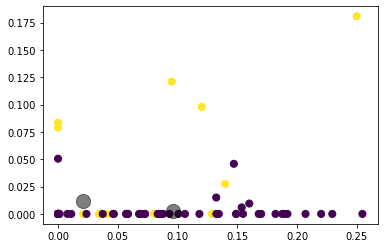

In [6]:
plt.scatter(first_hidden_output[:, 0], first_hidden_output[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = cluster.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.show()

In [18]:
# UMAP

import umap.umap_
import umap.plot

mapper = umap.umap_.UMAP().fit(first_hidden_output)

hover_data = pd.DataFrame({'index':np.arange(len(x_train)),
                           'label':y_train_origin})
hover_data['item'] = hover_data.label.map(
    {
        '0':'0',
        '1':'1',
    }
)

umap.plot.output_notebook()
p = umap.plot.interactive(mapper, labels=y_train_origin, hover_data=hover_data, point_size=2)
umap.plot.show(p)

#umap.plot.points(mapper, labels=y_train_origin,theme='fire')

Loading BokehJS ...